In [ ]:
#!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple wordcloud

In [1]:
import os
import jieba
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
comments=pd.read_csv('comments.csv')
comments=comments.iloc[:,1:]
comments

,7%,All Falls Down,Astronomia (Original Mix),Blueming,But U,Can We Kiss Forever,COCO,Dancing With Your Ghost,Darling,DEAR JOHN,...,追,遇见,隔岸,隔岸（DJ完整版）,雨爱,青丝,顽家,风的颜色,飞,麻雀
0,1％的包容 1％的宠爱 1％的陪伴 1％的贴心 1％的想念 1％的理解 1％的懂你\n剩下9...,Alan Walker新歌深夜上线！另外Alan Walker年仅20岁就取得了百大DJ 1...,哪个刁毛把它放进催眠歌曲单的？\n,“要和我一起绽放这百万朵玫瑰吗？”💙 喜欢IU，我觉的不仅是因为颜值，更多的是被实力征服的，...,Hey，半年好久，但深刻烙在我心里。我夜晚经常在宿舍阳台一发呆就是几个小时，想着那么多曾经触...,今天看到的一段话,谈啥恋爱啊 单身狗开心喝奶茶不好吗\n,冷酷又忧郁\n,你们听到开头那一声darling了吗 彩蛋诶\n,你的爱 像是备胎弄的咖啡 \n,...,保持纯真，简单就够\n,这歌我听了十年……好可怕的数字……\n,回顾皆如草木 唯你是青山。\n,床单，纸伞，扭胯，摇\n,早上4:50起床，穿上衣服出去晨跑，6:10之前回来，正好不误网课。路上有风，还有点冷。下雨...,千呼万唤的完整版《青丝》终于出来啦！感谢所有参与制作的人员 ！为了能更好的演绎整首歌 调整了...,或许这就是喜新恋旧\n,我才睡醒哈哈哈 不好意思来晚啦！这是我这张专辑里最喜欢的一首 如果在你的世界里 风也有颜色 ...,这首歌17年写的 18年发了一版后来不满意删了 这次重新修改后录制了这个版本 还记得当时发这...,网易云音乐的朋友们 欢迎收听我的新歌《麻雀》\n
1,我将是一个好女孩 气质出众 成绩拔尖 未来一片光明\n,"Alan Walker🇳🇴携新单All Falls Down在Mer Musikk发行,风格...",不好意思 真有女孩听这种歌\n,刚才在直播IU说，蓝色玫瑰是整张专辑里一个很重要的点，因为本来这个品种是不存在的，但是后来培...,想起两年前还不懂说唱时 听到的那首《PUMA》 现在女孩毕业了 长大了 祝她快乐 bulls...,曾经我把你推远 当我再想呼喊你名字时你早已消失在人海\n,百香果双响炮 永远的爱\n,夜晚真的太感性了 差点冲昏头脑说想你了\n,今天是我生日 今天的日推真好\n,“Dear John”成为一个大众词汇是在第二次世界大战的时候。男人们应征入伍，留下了他们的...,...,我爱你 但你让我的生活太糟心\n,暗恋四年，表白，花了三个星期做视频，背景音乐就是遇见。十动然拒。今年是第六年，我们都要大学毕...,满地都是六便士，他却抬头看到了月亮\n,可以呐，原唱亲自改的DJ版\n,你不能同时帮两个女孩撑伞\n我已经浑身湿透了。\n,“长安和太阳哪个更远？”\n年仅几岁的晋明帝第一次回答；“太阳远，因为见过有人从长安来，却没...,套路live的那个温柔版能也安排一下吗？\n,我觉得这首歌没有选错，几个人的rap我就只记住了这一首，我理解的rap不是为了炸场子而表现的...,就在刚刚 我刚刚在二楼的阳台上面 点了一根烟 楼下有一群孩子在玩耍 看见了我 就在楼下喊 叔...,麻雀虽小，五脏俱全\n眼睛虽小，可爱迷人\n
2,2020.2.14 ❤️❤️❤️\n,大家期待已久的《All Falls Down》终于发行！这次的女声vocal是由麦粒Mile...,这种歌是什么风格👌🏿我真的爱死了\n,看见有人问iu是哪个女团的。 好吧，我来解答。 IU来自【I♡U】女团，这个女团在2008年...,你说“不是逢人苦誉君 亦狂亦侠亦温文”\n你说“少年与爱永不老去 即使披荆斩棘丢失怒马鲜衣”...,挺喜欢你的 但你总让我不开心\n,🥤抽十杯CoCo奶茶送你们喝 这条底下评论就行\n,毋庸置疑，好的事情总会到来，而当它来晚时，也不失为一种惊喜。 — —《托斯卡纳艳阳下》\n,我想和你寻欢作乐 共度良宵\n,眼泪是真的，心酸是真的，想和你在一起一辈子也是真的。愿孤单的人不必逞强，愿逞强的身边永远有个...,...,“我向往,1万评论，希望有2万人幸福\n,谢谢大家的支持，这首歌是我和几个小伙伴也是制作人，也是老板的几位志同道合的朋友们一起合作得来...,既然大家喜欢我肯定要发的～有人喜欢就好，当然不喜欢的朋友也不要怀疑六一哦，六一初心是不会变的...,有授权的就不用标在歌名后面，里面一开始就写了，本作品经过词曲著作权利方授权，歌词里也写了原唱...,君君像是古代的剑客，又像是客栈的风尘女子，独特的嗓音真的是爱了爱了\n,怎么办 新歌歌词都会背了\n,乃万:我参加中国新说唱吴亦凡不让我过 我参加青春有你吴亦凡女朋友不让我过\n,爱情公寓经典语录: 当面对两个选择时，抛硬币总能奏效。 并不是因为它总能给出对的答案，而是在...,我在电动车论坛等得好辛苦。\n
3,上帝创造世界用了7天，第7日安息\n,再有人说AW江郎才尽，我就用这首歌抖断他的腿\n,刚刚在地铁上不小心吐了一口痰，发现一个外国妞用异样的眼光看着我，为了不给咱们中国人丢脸，我说...,"IU在音源发行前的直播说:""不太在意成绩，希望大家听到这张专辑心里能觉得幸福就好了。冬天到了...",少年与爱，永不老去！即便披荆斩棘，丢失怒马鲜衣！欢迎歌手乃万回归！\n,早恋这种东西 倘若你没本事带着对方往更好的方面发展 就请收起你所谓的喜欢和爱 别再出来祸害人...,撒娇是察觉到了被偏爱的可能\n,第一次翻译 献给喜欢的Sasha\n,我是刘家源 我发誓熬过异地恋就娶桂思雅.\n,比莉，1952年1月27日出生于中国台湾。\n1975年，她在美国巡演4年，是华语歌手在美国...,...,追……\n对于高三考生鸭\n追梦的过程才叫真实！！！\n,那天我约你跑步，可能也就我这种傻子才会约女生晨跑，一夜没睡，五点就在你家楼下站，你八点才下来...,我感觉大家文学功底都惊人的好啊，下次写歌我来征集一下名句吧让你们多些参与感\n,这首歌完美的响应了云音乐的网愈云计划\n,从《足够》开始喜欢周星星 然后就一发不可收拾了 她发的每一个作品每一首歌我都会去听 想成为像...,听君一歌 恍如昨日 青丝十年 海棠依旧 愿歌者永远歌唱 愿你我不负时光\n,欢迎回来！🥳🥳这首歌下架是多少人的意难平啊…总算是，该来的总会来，不用去猜。走起🤙🤙🤙\n,我想和乃万一起手拉手看风的颜色 \n,期待很久的新版本，恩信这首新歌的风格真的很喜欢。愿所有追求梦想的人都能在《篝火旁》看着自己的...,我在电动车论坛等的好辛苦，你却在这里发了新专辑\n
4,这是在说我们的数学作业只写了7%吗？\n,听着歌 吹着风 想着你 我都会很好 我都无所谓\n,医生: 保大保小\n丈夫,U➕ ae➕ na＝I love you.\nIU和Uaena就是最温暖最美好的一体！\n,关于 NINEONE# 💚\n第一眼惊艳\n第二眼沦陷\n第三眼不负遇见 I see nob...,今天格外冷清，窗外下起了小雨，望着窗外每天长高的大楼，眼里充满了麻木，还不完的房贷，加不完的...,coco给了多少钱啊我蜜雪冰城给你一百倍\n,“我不是来救你的，我是来爱你的”\n,我是桂思雅 我发誓熬过这段异地恋就嫁给刘家源.\n,网易一定要和Songtaste合作，Songtaste上面好歌太多了\n,...,“想要穿白衬衣，想要变干净，想要让你想到我就联想起盛夏白瓷和碎冰碰壁，想你想我时，嗅到凌晨四...,“嘴上说着单身挺好，可是看到两个人，还是会沉默”\n,我喜欢上我的老师了，他19大一，而我才15我才初三，我们差了四岁唉，我不明白为什么觉得我们有...,听到这首歌就想起那把撑着伞，摇的男人。\n,雨总能引起太多思念，喜欢有你打伞等候的公交站，也喜欢雨夜下班坐在公交车上痴看窗外的灯火阑珊，...,听到这首歌就想起了一夜新娘里面的岛主秦尚城 太上头了！！君君唱的超好听 不过听不够啊 万人血...,王祖贤没想到自己跟爽五年押韵\n,风的颜色是什么颜色？\n是NINEONE的颜色。\nNINEONE是什么颜色？\n是能在我心...,来自黑龙江\n,在某个明天，我留守人间摭拾人间烟火，你千里赴约飞跃雪山之巅。\n
5,我喜欢的人推了这首歌给我\n,无疑Alan Walker是北欧的电音奇才，我无法想象他在17岁前经历了什么有了哪些感悟引发...,太燃了，老子听着这首歌一口气撕了8张试卷、删了3篇论文、拉黑了9个老师，最后拉黑班主任的时候...,“相比承诺我更喜欢约定，「我会一直爱你」显然没有「明天一起吃饭」又浪漫又实在。”\n,请问这一整首歌都是乃万唱的吗？\n,有些人只是隔着手机屏幕喜欢一个人\n,hook声音太像knowknow了吧\n,前奏,传说有一种鸟名为『比翼鸟』\n它仅有一只翅膀\n若雌雄鸟不互相依偎\n便无法在天际翱翔\n是...,年纪越大越会明白，少年时曾说过的话，不管多么情真意切，最后也终流于天真，但是有什么关系呢，那...,...,看到的一个很暖的评论,从初中听到大学，总是在遇见，总是在离开\n,英雄被人铭记，刻在石碑上;幸存者被人遗忘，面目全非。\n“真遗憾，阿瓒棺木上应该盖着国旗呢”...,好家伙把原唱逼得出dj版\n,怎么办啊我今天真的好开心啊啊啊啊啊啊啊啊啊啊啊他跟我表白了啊啊啊啊啊啊啊啊啊啊啊啊啊表白完了...,君只见，北凉三十万铁骑。\n君不见，北凉参差百万户，十室九空。\n,

In [3]:
word_list=[]
for i in range(15):
    for j in range(192):
        temps=jieba.lcut(comments.iat[i,j])
        for temp in temps:
            if len(temp)>1:
                word_list.append(temp)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cheny\AppData\Local\Temp\jieba.cache
Loading model cost 0.658 seconds.
Prefix dict has been built successfully.


In [4]:
word_str=' '.join('%s' %id for id in word_list)

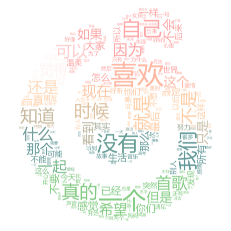

In [5]:
color_mask = np.array(Image.open("netease.png"))
backgroud_Image=np.array(Image.open("color.png"))
image_colors = ImageColorGenerator(backgroud_Image)


font='微软vista雅黑.ttf'
wordcloud=WordCloud(background_color='white',width=1000,height=1000,font_path =font,max_words=200,color_func=image_colors,mask=color_mask,scale=4).generate(word_str)


plt.imshow(wordcloud)
plt.axis('off')

plt.savefig('wordcloud.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

In [6]:
counts = {}
for word in word_list:
    counts[word] = counts.get(word, 0)+1

items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)

In [7]:
items_df=pd.DataFrame(items[0:20],columns=['word','count'])
items_df

,word,count
0,喜欢,460
1,一个,385
2,没有,286
3,我们,253
4,自己,251
5,真的,187
6,就是,186
7,时候,179
8,知道,173
9,不是,163


In [12]:
plt.style.use('seaborn-poster')
plt.rcParams['font.sans-serif'] = ['SimHei']

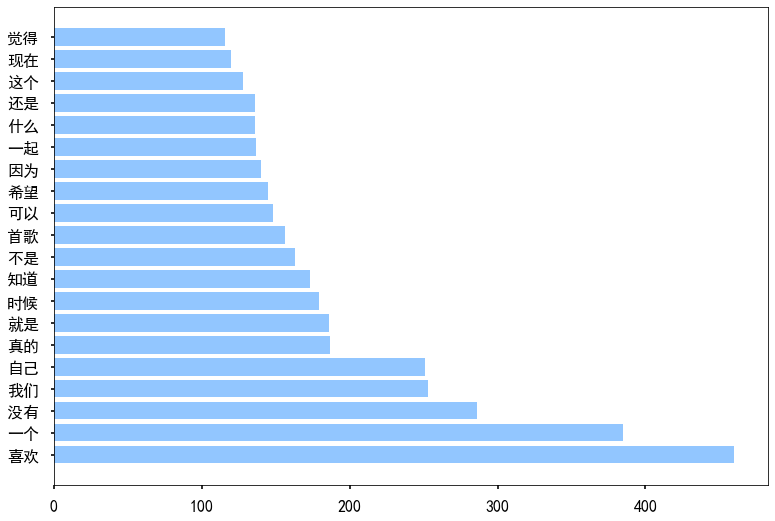

In [13]:
plt.barh(items_df['word'],items_df['count'])
plt.savefig('barh.jpg', dpi=1000,bbox_inches='tight', quality=95)

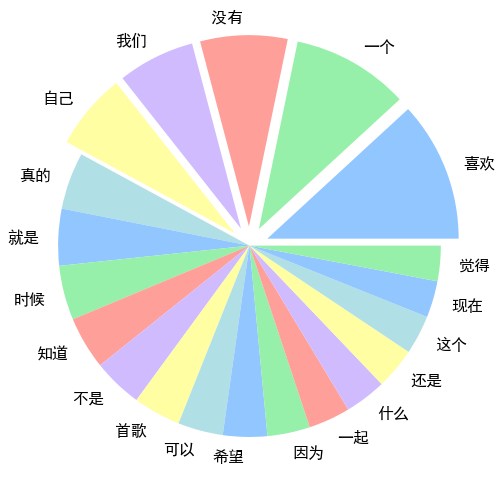

In [14]:
plt.pie(items_df['count'],labels=items_df['word'],explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,))
plt.savefig('pie.jpg', dpi=1000,bbox_inches='tight', quality=95)